# Proyecto 2-Parte I (Core)

Dataset De Pasajeros del Titanic: [Link en Kaggle](https://www.kaggle.com/datasets/shubhamgupta012/titanic-dataset)

In [24]:
import pandas as pd


camino_ds = "../data/dataset4_titanic.csv"
df = pd.read_csv(camino_ds)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.6+ KB


## EDA

### Descripción del Conjunto de Datos

El conjunto de datos Titanic Passenger proporciona información sobre los pasajeros que estaban a bordo del RMS Titanic durante su desafortunado viaje inaugural. Este conjunto de datos se utiliza a menudo para explorar patrones y factores asociados con la supervivencia en el Titanic. Posee 889 filas y 9 características.

El conjunto de datos incluye las siguientes columnas:

* PassengerId: Identificador único de cada pasajero.
* Sobrevivido: Estado de supervivencia del pasajero (0 = No sobrevivido, 1 = Sobrevivido).
* Pclass: Clase de pasajero (1 = Primera clase, 2 = Segunda clase, 3 = Tercera clase).
* Sexo: Género del pasajero.
* Edad: Edad del pasajero.
* SibSp: Número de hermanos/cónyuges a bordo del Titanic.
* Parch: Número de padres/hijos a bordo del Titanic.
* Tarifa: Tarifa pagada por el pasajero.
* Embarcado: Puerto de embarque (C = Cherburgo, Q = Queenstown, S = Southampton).

### Análisis estadístico descriptivo.

#### Calcular estadísticas descriptivas básicas (media, mediana, desviación estándar, etc.) para las variables numéricas.

In [26]:
from utils.eda_utils import obtener_estadisticas_descriptivas_df_es


obtener_estadisticas_descriptivas_df_es(df).T

,Cantidad,Mínimo,Máximo,Promedio,Desviación Estándar,Mediana,Coeficiente de Variación
PassengerId,889.0,1.00,891.0000,446.000000,256.998173,446.0000,0.576229
Survived,889.0,0.00,1.0000,0.382452,0.486260,0.0000,1.271426
Pclass,889.0,1.00,3.0000,2.311586,0.834700,3.0000,0.361094
Age,889.0,0.42,80.0000,35.686355,17.756733,32.0000,0.497578
SibSp,889.0,0.00,8.0000,0.524184,1.103705,0.0000,2.105566
Parch,889.0,0.00,6.0000,0.382452,0.806761,0.0000,2.109442
Fare,889.0,0.00,512.3292,32.096681,49.697504,14.4542,1.548369
Embarked,889.0,1.00,3.0000,2.535433,0.792088,3.0000,0.312407


Podemos ver que en todos los campos la Desviación estándar es muy alta, por lo cual la la mediana es mas útil para analizar este dataset.

Además, podemos notar la existencia de posibles parámetros booleanos (Columna Survived)

Convertimos las columnas booleanas.

In [27]:
from utils.eda_utils import obtener_columnas

columnas = obtener_columnas(df)

columnas_convertidas_booleanas = []

valores_columnas_booleanas_potenciales = [
    set([0, 1]),
    set([0.0, 1.0]),
    set(["false", "true"]),
    set(["no", "yes"]),
    set(["no", "si"]),
]


def _convertir_valor_a_booleano(x):
    if x in [0, 0.0, "false", "no", "no"]:
        return False

    if x in [1, 1.0, "true", "yes", "si"]:
        return True

    return x


for columna in columnas:
    valores_unicos = df[columna].dropna().unique()

    columna_booleana_encontrada = False

    if len(valores_unicos) == 2:
        print(f"Valores de columna '{columna}': {str(valores_unicos)}")

        for posibilidad_valores_booleanos in valores_columnas_booleanas_potenciales:
            if set(valores_unicos) == posibilidad_valores_booleanos:
                print(f"La columna '{columna}' es booleana. Será convertida.")
                df[columna] = df[columna].apply(_convertir_valor_a_booleano)
                df[columna] = df[columna].astype("bool")

                columna_booleana_encontrada = True
                break

    if columna_booleana_encontrada:
        columnas_convertidas_booleanas.append(columna)


print(f"Columnas convertidas a booleanas: {str(columnas_convertidas_booleanas)}")

Valores de columna 'Survived': [0 1]
La columna 'Survived' es booleana. Será convertida.
Valores de columna 'Sex': ['Male' 'female']
Columnas convertidas a booleanas: ['Survived']


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    bool   
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: bool(1), float64(2), int64(5), object(1)
memory usage: 56.6+ KB


Verificamos ahora las columnas categóricas.

In [29]:
from utils.eda_utils import obtener_columnas_categoricas_df

columnas_categoricas = obtener_columnas_categoricas_df(df)

columnas_categoricas

['Sex']

Limpiamos las cadenas.

In [30]:
from utils.eda_utils import limpiar_cadena


for columna_categorica in columnas_categoricas:
    df[columna_categorica] = df[columna_categorica].apply(limpiar_cadena)

Convertimos las columnas que potencialmente sean categóricas.

In [31]:
from utils.eda_utils import obtener_columnas_numericas_df, obtener_columnas_categoricas_df

columnas_categoricas_esperadas = [
    "Sex",
    "Pclass",
    "Embarked"
]


porcentaje_max_columnas_categoricas = 0.10
cant_filas_df = df.shape[0]

columnas_a_excluir = []
columnas_convertidas_a_categoricas = []

for columna in columnas_categoricas_esperadas:
    valores_unicos = df[columna].dropna().unique().tolist()
    print(f"Cant. únicos para columna '{columna}': {len(valores_unicos)}")
    if len(valores_unicos) <= (0.1 * cant_filas_df):
        
        print(f"Valores únicos columna '{columna}': {str(valores_unicos)}")
        print(f"Se procede a convertir la columna '{columna}' a categórica")
        df[columna] = df[columna].astype("category")
        columnas_convertidas_a_categoricas.append(columna)
    else:
        print(f"No se convierte la columna '{columna}'")

    del valores_unicos

print(f"\nColumnas convertidas a categóricas: {str(columnas_convertidas_a_categoricas)}")

Cant. únicos para columna 'Sex': 2
Valores únicos columna 'Sex': ['male', 'female']
Se procede a convertir la columna 'Sex' a categórica
Cant. únicos para columna 'Pclass': 3
Valores únicos columna 'Pclass': [3, 1, 2]
Se procede a convertir la columna 'Pclass' a categórica
Cant. únicos para columna 'Embarked': 3
Valores únicos columna 'Embarked': [3, 1, 2]
Se procede a convertir la columna 'Embarked' a categórica

Columnas convertidas a categóricas: ['Sex', 'Pclass', 'Embarked']


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  889 non-null    int64   
 1   Survived     889 non-null    bool    
 2   Pclass       889 non-null    category
 3   Sex          889 non-null    category
 4   Age          889 non-null    float64 
 5   SibSp        889 non-null    int64   
 6   Parch        889 non-null    int64   
 7   Fare         889 non-null    float64 
 8   Embarked     889 non-null    category
dtypes: bool(1), category(3), float64(2), int64(3)
memory usage: 38.7 KB


Ya todas las columnas poseen su tipo correcto.

#### Analizar la distribución de las variables categóricas.

A modo de agrupar los datos, se agrega también una columna de rango de edad.

In [33]:
# Rangos etarios obtenidos de este sitio: https://www.palbin.com/es/blog/p1009-que-edad-tienen-tus-compradores-plan-de-marketing-digital.html
def obtener_rango_etario(x):
    if 0 <= x < 18:
        return "0-18"

    if 18 <= x < 25:
        return "18-25"

    if 25 <= x < 40:
        return "25-40"

    if 40 <= x < 65:
        return "40-65"
    
    return "65+"


df["Age Range"] = df["Age"].apply(obtener_rango_etario).astype("category")

Buscamos las variables categóricas

In [34]:
from utils.eda_utils import obtener_columnas_categoricas_df


obtener_columnas_categoricas_df(df)

['Pclass', 'Sex', 'Embarked', 'Age Range']

Creamos e imprimimos tablas de frecuencias vs la variable objetivo Survived

In [35]:
columnas_categoricas = obtener_columnas_categoricas_df(df)
columnas_a_analizar = [*columnas_categoricas]


for columna in columnas_a_analizar:
    print(f"\nTabla de frecuencia Columna '{columna}' vs Survived:\n")
    crosstab_column = pd.crosstab(index=df["Survived"], columns=df[columna], margins=True)
    print(crosstab_column)
    print("\n")
    print(f"Tabla de proporciones totales Columna '{columna}' vs Survived:\n")
    crosstab_column_perc = crosstab_column / crosstab_column.loc["All", "All"]
    print(crosstab_column_perc)
    print("\n")
    print(f"Tabla de proporciones por columna. Columna '{columna}' vs Survived:\n")
    crosstab_column_perc_by_column = crosstab_column / crosstab_column.loc["All"]
    print(crosstab_column_perc_by_column)


Tabla de frecuencia Columna 'Pclass' vs Survived:

Pclass      1    2    3  All
Survived                    
False      80   97  372  549
True      134   87  119  340
All       214  184  491  889


Tabla de proporciones totales Columna 'Pclass' vs Survived:

Pclass           1         2         3       All
Survived                                        
False     0.089989  0.109111  0.418448  0.617548
True      0.150731  0.097863  0.133858  0.382452
All       0.240720  0.206974  0.552306  1.000000


Tabla de proporciones por columna. Columna 'Pclass' vs Survived:

Pclass           1         2         3       All
Survived                                        
False     0.373832  0.527174  0.757637  0.617548
True      0.626168  0.472826  0.242363  0.382452
All       1.000000  1.000000  1.000000  1.000000

Tabla de frecuencia Columna 'Sex' vs Survived:

Sex       female  male  All
Survived                   
False         81   468  549
True         231   109  340
All          312   57

De estas tablas, podemos notar que hay mas sobrevivientes mujeres. También podemos notar que pasajeros de primera clase tuvieron más probabilidades de sobrevivir.

### Visualizaciones.

#### Crear visualizaciones para entender la distribución de las variables (histogramas, gráficos de barras, box plots, etc.).

##### Histogramas

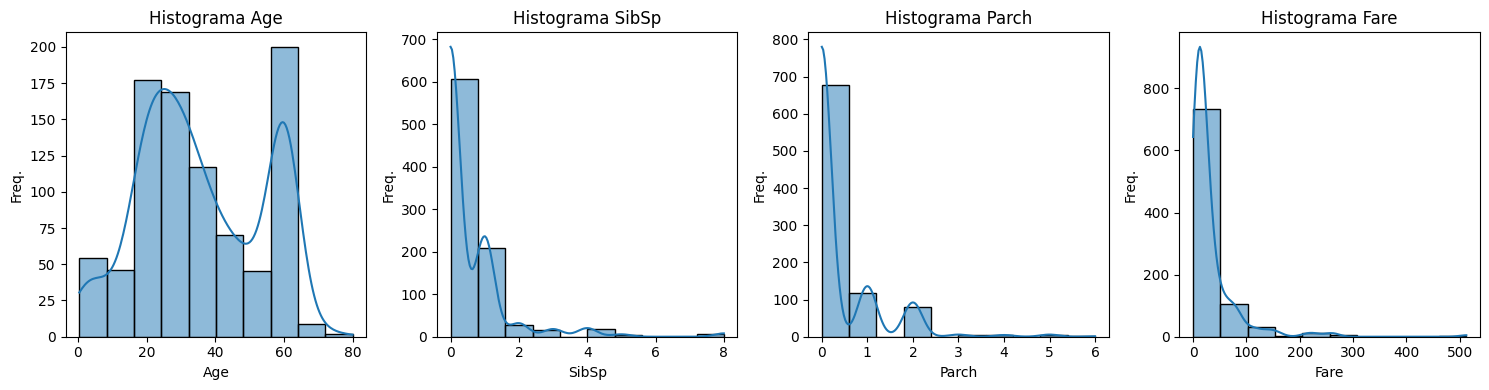

In [36]:
from utils.eda_utils import graficar_histogramas
from utils.eda_utils import obtener_columnas_numericas_df


columnas_numericas_a_graficar = obtener_columnas_numericas_df(df)
columnas_numericas_a_graficar.remove("PassengerId")

graficar_histogramas(df, columnas_numericas_a_graficar, nro_columnas=4, bins=10, kde=True, figsize=(15, 4))

De todos estos gráficos, podemos notar que los datos no siguen una distribución normal.

##### Boxplots

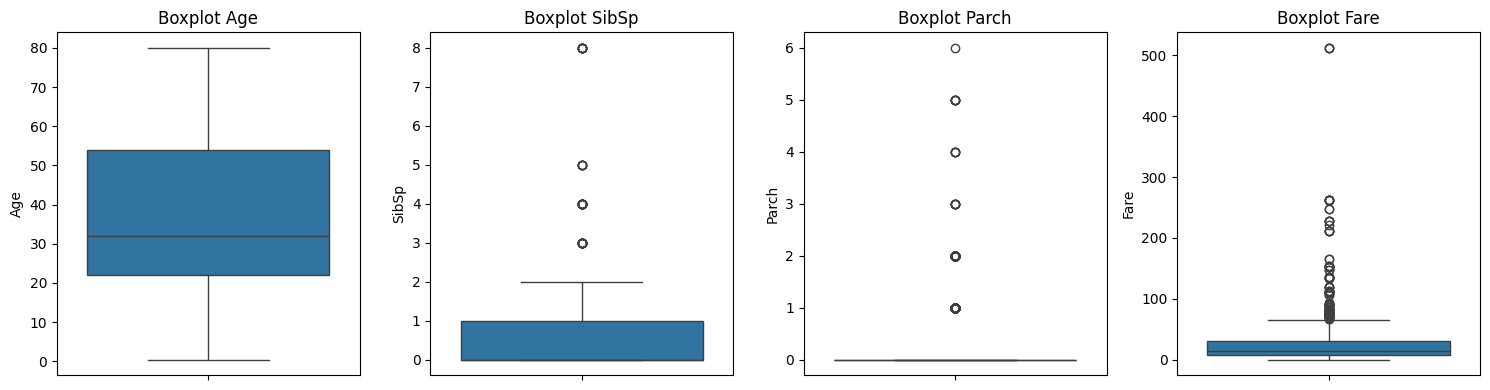

In [37]:
from utils.eda_utils import graficar_boxplots


graficar_boxplots(df, columnas_numericas_a_graficar, nro_columnas=4, figsize=(15, 4))

Podemos notar que los datos tienen una gran cantidad de outliers. No obstante, estos outliers no parecen ser valores incorrectos, por lo que se deben mantener en el df. Debido a la gran cant. de outliers, una buena alternativa de escalado sería el RobustScaler.

#### Visualizar las correlaciones entre variables (mapa de calor de correlación).

##### Gráficos de barras de todos los campos vs columna Survived

/Users/diego/Documents/Programacion/ds_bootcamp/coding-dojo-ds-bootcamp/machine_learning/2_modelos_de_clasificacion/3_proyecto_2_parte_1/EDA/utils/eda_utils.py:199: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agrupado = df.groupby([columna,
/Users/diego/Documents/Programacion/ds_bootcamp/coding-dojo-ds-bootcamp/machine_learning/2_modelos_de_clasificacion/3_proyecto_2_parte_1/EDA/utils/eda_utils.py:199: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agrupado = df.groupby([columna,


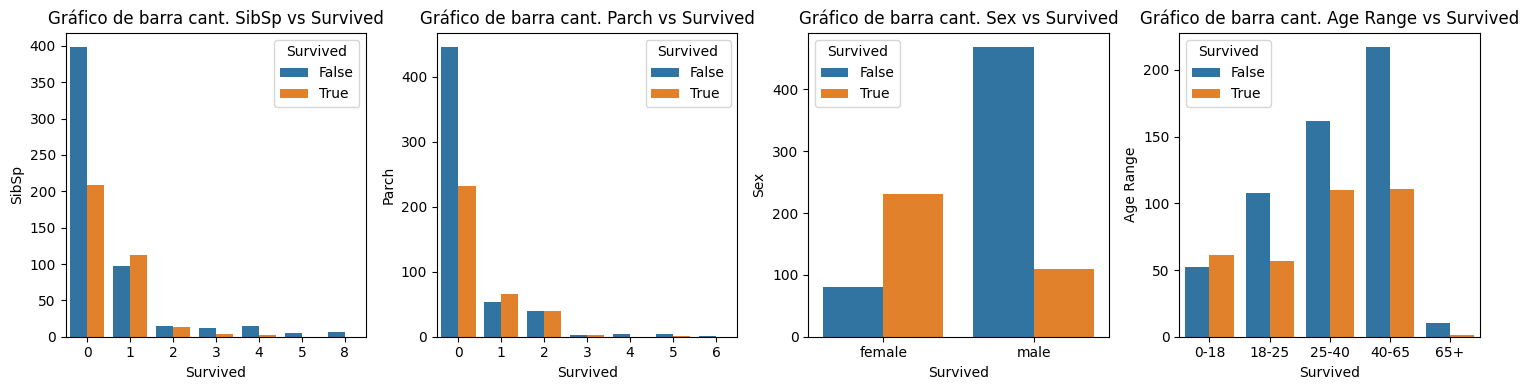

In [38]:
from utils.eda_utils import graficar_barras_conteo

columnas_a_graficar_barras = [*columnas_numericas_a_graficar] + ["Sex", "Age Range"]
columnas_a_graficar_barras.remove("Age")
columnas_a_graficar_barras.remove("Fare")

graficar_barras_conteo(df, columnas_a_graficar_barras,  "Survived", nro_columnas=4, figsize=(15, 4))

De estos gráficos, notamos lo siguiente:
* Hubieron más sobrevivientes que no tenían dependientes en el Titanic
* Hubieron más sobrevivientes mujeres que hombres
* El rango de edad también afecta la cant. de sobrevivientes.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  889 non-null    int64   
 1   Survived     889 non-null    bool    
 2   Pclass       889 non-null    category
 3   Sex          889 non-null    category
 4   Age          889 non-null    float64 
 5   SibSp        889 non-null    int64   
 6   Parch        889 non-null    int64   
 7   Fare         889 non-null    float64 
 8   Embarked     889 non-null    category
 9   Age Range    889 non-null    category
dtypes: bool(1), category(4), float64(2), int64(3)
memory usage: 39.8 KB


##### Heatmap

             PassengerId       Age     SibSp     Parch      Fare    Pclass  \
PassengerId     1.000000  0.008341 -0.057686 -0.001657  0.012703 -0.035330   
Age             0.008341  1.000000 -0.156777 -0.215191 -0.003307 -0.122449   
SibSp          -0.057686 -0.156777  1.000000  0.414542  0.160887  0.081656   
Parch          -0.001657 -0.215191  0.414542  1.000000  0.217532  0.016824   
Fare            0.012703 -0.003307  0.160887  0.217532  1.000000 -0.548193   
Pclass         -0.035330 -0.122449  0.081656  0.016824 -0.548193  1.000000   
Sex Numeric     0.043136  0.102014 -0.116348 -0.247508 -0.179958  0.127741   
Survived       -0.005028 -0.116558 -0.034040  0.083151  0.255290 -0.335549   

             Sex Numeric  Survived  
PassengerId     0.043136 -0.005028  
Age             0.102014 -0.116558  
SibSp          -0.116348 -0.034040  
Parch          -0.247508  0.083151  
Fare           -0.179958  0.255290  
Pclass          0.127741 -0.335549  
Sex Numeric     1.000000 -0.541585  
S

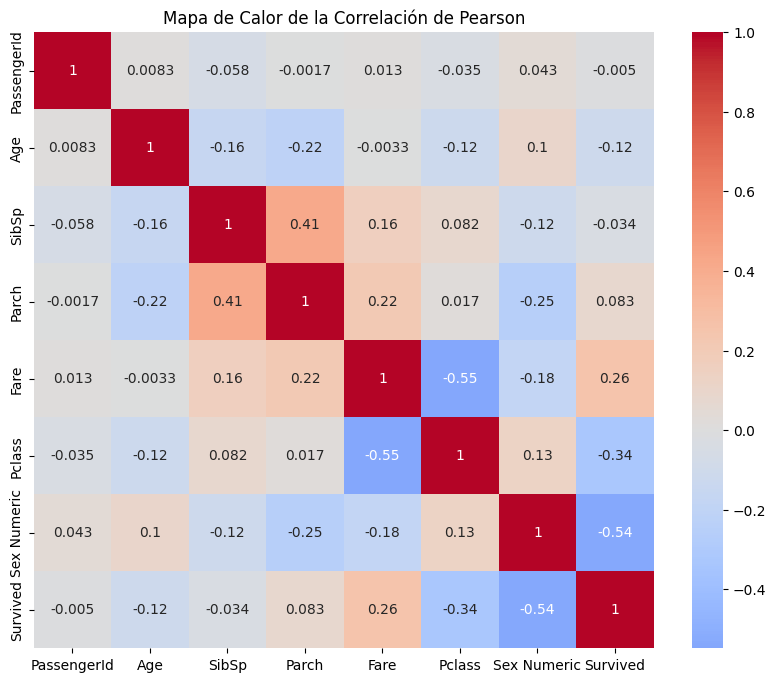

In [46]:
from utils.eda_utils import graficar_mapa_correlacion

columnas_numericas = obtener_columnas_numericas_df(df)

df["Sex Numeric"] = df["Sex"].apply(lambda x: 1 if x == "male" else 0)

graficar_mapa_correlacion(df, columnas_numericas + ["Pclass", "Sex Numeric", "Survived"], figsize=(10, 8))

df.drop("Sex Numeric", axis=1, inplace=True)

De este heatmap, podemos notar una leve correlación entre las variables dependientes Fare, Age, Pclass, Sex, y la variable a predecir Survived

### Identificación de Valores Nulos y Outliers:

#### Detectar valores nulos y discutir cómo podrían ser tratados.

In [47]:
from utils.eda_utils import obtener_estadisticas_datos_nulos


obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
PassengerId,889,0,0.0
Survived,889,0,0.0
Pclass,889,0,0.0
Sex,889,0,0.0
Age,889,0,0.0
SibSp,889,0,0.0
Parch,889,0,0.0
Fare,889,0,0.0
Embarked,889,0,0.0
Age Range,889,0,0.0


No existen valores nulos en este dataset, por lo que no será necesario tratarlos.

#### Identificar outliers y evaluar su impacto potencial en el análisis.

In [48]:
from utils.eda_utils import obtener_datos_outliers_df


obtener_datos_outliers_df(df).T

,Nro. Outliers,Porc. Outliers,Límite mínimo,Límite máximo
PassengerId,0.0,0.000000,-442.0000,1334.0000
Age,0.0,0.000000,-26.0000,102.0000
SibSp,46.0,5.174353,-1.5000,2.5000
Parch,213.0,23.959505,0.0000,0.0000
Fare,114.0,12.823397,-26.7605,65.6563


Existen varios outliers en el dataset. Esto hay que tenerlo en cuenta al elegir el escalador.

### Resumen de Hallazgos:

Del EDA, se puede destacar lo siguiente

* El dataset es bueno para aplicar métodos de clasificación binaria en la columna Survived
* Según los histogramas, se puede notar que varias columnas no siguen una distribución estándar, por lo que se debe tener en cuenta en el escalado
* Existe una gran cantidad de outliers en varias columnas, por lo que se debe tener en cuenta también a la hora de escalar
* Existen correlaciones entre las variables dependientes Fare, Age, Pclass, Sex, y la variable a predecir Survived